In [52]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
sns.set()
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv("C:/Users/nupoo/Desktop/Technocolabs_Project/Cleaning_data.csv")

In [54]:
df

,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,ISR,NLD,RUS,SGP,SWE,USA,other.1,isClosed,Age_in_Days,Age_in_Days.1
0,operating,2005.0,9.010471,2005.0,2008.0,3.0,39750000.0,2010.000000,2013.000000,5.000000,...,False,False,False,False,False,True,False,1.0,6935.0,6935.0
1,acquired,2007.0,9.010471,2008.0,2008.0,1.0,5000000.0,2008.000000,2012.000000,3.000000,...,False,False,False,False,False,True,False,0.0,0.0,0.0
2,operating,2007.0,9.010471,2008.0,2013.0,5.0,68069200.0,2010.164879,2011.046642,1.703825,...,False,False,False,False,False,True,False,1.0,6205.0,6205.0
3,operating,2003.0,9.010471,2011.0,2012.0,3.0,10125293.0,2010.000000,2010.000000,1.000000,...,False,False,False,False,False,True,False,1.0,7665.0,7665.0
4,operating,2006.0,9.010471,2008.0,2013.0,3.0,33000000.0,2010.000000,2013.000000,3.000000,...,False,False,False,False,False,True,False,1.0,6570.0,6570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20462,closed,2008.0,9.010471,2008.0,2008.0,1.0,130000.0,2008.000000,2009.000000,2.000000,...,False,False,False,False,False,True,False,0.0,0.0,0.0
20463,operating,2011.0,9.010471,2011.0,2011.0,1.0,500000.0,2011.000000,2011.000000,1.000000,...,False,False,False,False,False,False,False,1.0,4745.0,4745.0
20464,closed,2006.0,9.010471,2008.0,2009.0,2.0,1100000.0,2005.000000,2008.000000,2.000000,...,False,False,False,False,False,True,False,0.0,0.0,0.0
20465,operating,2007.0,9.010471,2008.0,2008.0,1.0,750000.0,2013.000000,2013.000000,1.000000,...,False,False,False,False,False,True,False,1.0,6205.0,6205.0


In [55]:
# Initialized LabelEncoder
label_encoder = LabelEncoder()

# Fit and transformed the 'status' column
df['status_encoded'] = label_encoder.fit_transform(df['status'])

# 0:aquaired, 1:closed, 2:ipo, 3:operating

In [56]:
df.tail(60)

,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,NLD,RUS,SGP,SWE,USA,other.1,isClosed,Age_in_Days,Age_in_Days.1,status_encoded
20407,acquired,2000.0,9.010471,2007.0,2007.0,1.0,3000000.0,2002.000000,2002.000000,1.000000,...,False,False,False,False,False,False,0.0,0.0,0.0,0
20408,operating,2006.0,9.010471,2009.0,2009.0,1.0,510000.0,2010.164879,2011.046642,1.703825,...,False,False,False,False,True,False,1.0,6570.0,6570.0,3
20409,acquired,2009.0,9.010471,2008.0,2009.0,2.0,2200000.0,2009.000000,2010.000000,3.000000,...,False,False,False,False,True,False,0.0,0.0,0.0,0
20410,ipo,2005.0,9.010471,2006.0,2012.0,5.0,328600000.0,2010.164879,2011.046642,1.703825,...,False,False,False,False,True,False,1.0,6935.0,6935.0,2
20411,operating,2006.0,9.010471,2007.0,2013.0,4.0,13269616.0,2010.000000,2010.000000,1.000000,...,False,False,False,False,True,False,1.0,6570.0,6570.0,3
20412,closed,2007.0,9.010471,2007.0,2007.0,1.0,100000.0,2010.164879,2011.046642,1.703825,...,False,False,False,False,False,False,0.0,0.0,0.0,1
20413,acquired,2006.0,9.010471,2007.0,2008.0,3.0,2600000.0,2010.000000,2011.000000,2.000000,...,False,False,False,False,True,False,0.0,0.0,0.0,0
20414,operating,2011.0,9.010471,2011.0,2012.0,3.0,3450430.0,2008.000000,2011.000000,3.000000,...,False,False,False,False,True,False,1.0,4745.0,4745.0,3
20415,operating,2008.0,9.010471,2008.0,2008.0,1.0,250000.0,2010.164879,2011.046642,1.703825,...,False,False,False,False,True,False,1.0,5840.0,5840.0,3
20416,acquired,2011.0,9.010471,2012.0,2012.0,1.0,1000000.0,2012.000000,2013.000000,2.000000,...,False,False,True,False,False,False,0.0,0.0,0.0,0


In [57]:
# Droped the columns 'status','isClosed','Age_in_Days.1','founded_at'
df.drop(['status','Age_in_Days.1','isClosed','founded_at'], axis=1, inplace=True)

# Checking class imbalance for target variable

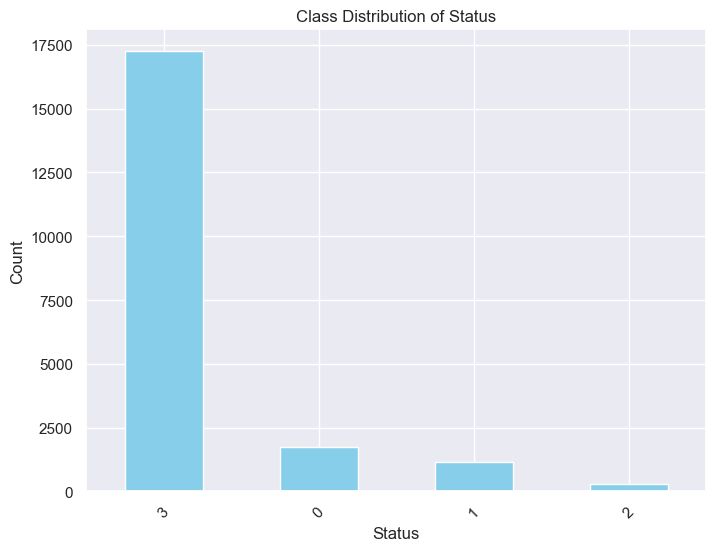

Class Counts:
3    17250
0     1747
1     1167
2      303
Name: status_encoded, dtype: int64


In [58]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = df['status_encoded'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Class Counts:")
print(class_counts)

# SMOTE analysis

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
# Separated features and target variable
X = df.drop('status_encoded', axis=1)
y = df['status_encoded']

# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Concatenated the resampled features and target variable
df_smote = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.Series(y_smote, name='status_encoded')], axis=1)

# class distribution after SMOTE
print(df_smote['status_encoded'].value_counts())

3    17250
0    17250
1    17250
2    17250
Name: status_encoded, dtype: int64


In [61]:
df_smote

,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,...,IRL,ISR,NLD,RUS,SGP,SWE,USA,other.1,Age_in_Days,status_encoded
0,9.010471,2005.000000,2008.000000,3.000000,3.975000e+07,2010.000000,2013.000000,5.000000,17.000000,47.606209,...,False,False,False,False,False,False,True,False,6935.000000,3
1,9.010471,2008.000000,2008.000000,1.000000,5.000000e+06,2008.000000,2012.000000,3.000000,14.000000,37.386052,...,False,False,False,False,False,False,True,False,0.000000,0
2,9.010471,2008.000000,2013.000000,5.000000,6.806920e+07,2010.164879,2011.046642,1.703825,14.000000,37.774929,...,False,False,False,False,False,False,True,False,6205.000000,3
3,9.010471,2011.000000,2012.000000,3.000000,1.012529e+07,2010.000000,2010.000000,1.000000,6.000000,30.267153,...,False,False,False,False,False,False,True,False,7665.000000,3
4,9.010471,2008.000000,2013.000000,3.000000,3.300000e+07,2010.000000,2013.000000,3.000000,19.000000,37.774929,...,False,False,False,False,False,False,True,False,6570.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68995,9.010471,2007.615566,2010.038325,3.038325,9.883292e+07,2009.961675,2011.692217,2.038325,29.384434,41.476766,...,False,False,False,False,False,False,True,False,8367.022547,2
68996,9.010471,2005.084040,2012.542020,12.084040,8.045930e+08,2010.626060,2013.000000,3.915960,29.991520,37.507527,...,False,False,False,False,False,False,True,False,7071.488092,2
68997,9.010471,2007.058530,2007.058530,1.000000,3.735284e+07,2010.411373,2010.411373,1.000000,8.177254,38.070309,...,False,False,False,False,False,False,True,False,7901.212202,2
68998,9.010471,2008.252281,2010.551369,3.149544,7.585046e+07,2006.622832,2012.707887,1.955709,10.841331,46.901106,...,False,False,False,False,False,False,True,False,11499.165294,2


# Xgboost without scaling the data

In [62]:
X = df_smote.drop('status_encoded', axis=1)
y = df_smote['status_encoded']

In [63]:
#pip install xgboost

In [64]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [65]:
# Splited the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defined the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y_train.unique()), random_state=42)

# Trained the classifier
xgb_classifier.fit(X_train, y_train)

# Predicted on the testing set
y_pred = xgb_classifier.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9682608695652174
Precision: 0.9682691134033377
Recall: 0.9682608695652174
F1 Score: 0.9682606866427216


# Xgboost after scaling the data

In [67]:
# Splited the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaled the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defined the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y_train.unique()), random_state=42)

# Trained the classifier
xgb_classifier.fit(X_train_scaled, y_train)

# Predicted on the testing set
y_pred = xgb_classifier.predict(X_test_scaled)


In [68]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9682608695652174
Precision: 0.9682888692341737
Recall: 0.9682608695652174
F1 Score: 0.9682585833521731


In [69]:
# Defined the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y_train.unique()), random_state=42)

# Defined hyperparameters and their values to search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [4,5,6]
}

# Performed grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}


In [70]:
# Get the best model
best_xgb_classifier = grid_search.best_estimator_

# Predicted on the testing set using the best model
y_pred = best_xgb_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9657246376811595
Precision: 0.9657323783311585
Recall: 0.9657246376811595
F1 Score: 0.965724726663851
